ZADANIE 1

93.7 685.8

1990 1954

3     1953
32    1982
33    1983
37    1987
38    1988
39    1989
40    1990
41    1991
42    1992
43    1993
44    1994
45    1995
Name: Rok, dtype: int64


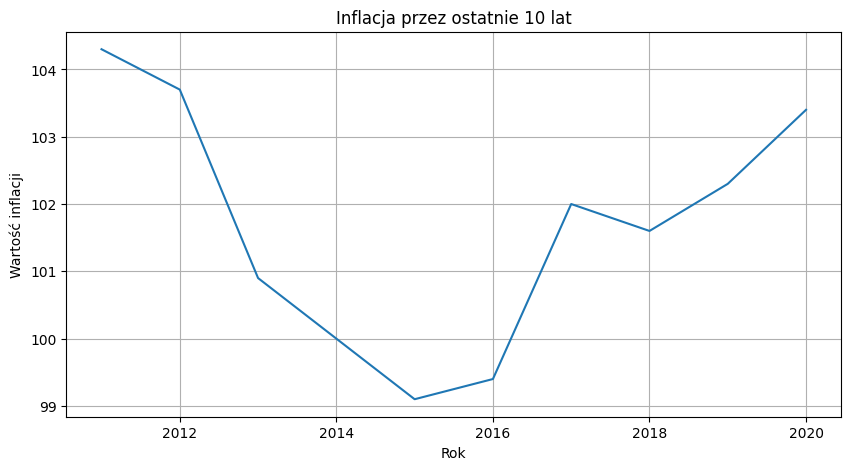

In [11]:


import pandas as pd
from matplotlib import pyplot as plt
from pandas.core.interchange.from_dataframe import primitive_column_to_ndarray

df = pd.read_excel("data/inflacja.xlsx")
# print(df1)

min_val = df['Wartość'].min()
max_val = df['Wartość'].max()
print(min_val, max_val)
print()

max_year = df.loc[df['Wartość'].idxmax(), 'Rok']
min_year = df.loc[df['Wartość'].idxmin(), 'Rok']
print(max_year, min_year)
print()

mean = df['Wartość'].mean()
years_above = df[df['Wartość'] > mean]['Rok']
print(years_above)

df_10 = df[-10:]
plt.figure(figsize=(10, 5))
plt.plot(df_10['Rok'], df_10['Wartość'])
plt.title('Inflacja przez ostatnie 10 lat')
plt.xlabel('Rok')
plt.ylabel('Wartość inflacji')
plt.grid(True)
plt.show()




ZADANIE 2

In [53]:
df_m = pd.read_excel("data/trwanieZycia.xlsx", sheet_name="Ogółem mężczyźni", header=2)
df_w = pd.read_excel("data/trwanieZycia.xlsx", sheet_name="Ogółem kobiety", header=2)
columns = ['Wiek', 'Prawdopodobienstwo zgonu', 'Liczba dozywajacych', 'Liczba zmarlych', 'Ludnosc stacjonarna w wieku x', 'Ludnosc stacjonarna skumulowana', 'Przecietne dalsze trwanie zycia']
df_m.columns = columns
df_w.columns = columns

df_m.drop(index=[0,1,2], inplace=True)
df_w.drop(index=[0,1,2], inplace=True)

df_m = df_m.reset_index(drop=True)
df_w = df_w.reset_index(drop=True)

df_m = df_m[['Wiek', 'Przecietne dalsze trwanie zycia']]
df_w = df_w[['Wiek', 'Przecietne dalsze trwanie zycia']]

df_m.columns = ['Wiek', 'Przecietne dalsze trwanie zycia men']
df_w.columns = ['Wiek', 'Przecietne dalsze trwanie zycia women']

df = pd.merge(df_m, df_w, on='Wiek')
df['roznica'] = df['Przecietne dalsze trwanie zycia women'] - df['Przecietne dalsze trwanie zycia men']

df_sorted = df.sort_values(by=['roznica'], ascending=False)
df_sorted


,Wiek,Przecietne dalsze trwanie zycia men,Przecietne dalsze trwanie zycia women,roznica
0,0,74.65,81.99,7.34
16,16,59.1,66.4,7.3
14,14,61.07,68.37,7.3
7,7,68.02,75.32,7.3
10,10,65.04,72.34,7.3
...,...,...,...,...
96,96,2.88,3.01,0.13
97,97,2.73,2.82,0.09
98,98,2.59,2.65,0.06
99,99,2.46,2.49,0.03


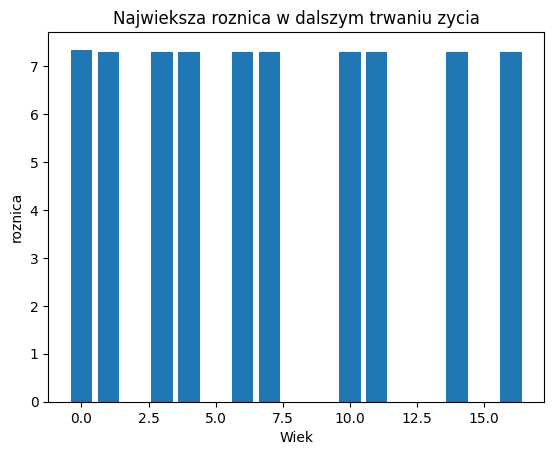

In [61]:
top_10 = df_sorted.head(10)
plt.bar(top_10['Wiek'], top_10['roznica'])
plt.title('Najwieksza roznica w dalszym trwaniu zycia')
plt.xlabel('Wiek')
plt.ylabel('roznica')
plt.show()

ZADANIE 3

In [127]:
from datetime import datetime
import numpy as np

df = pd.read_html('https://bip.polsl.pl/oferty-pracy/')
df = df[0]

df = df[['Data ogłoszenia', 'Tytuł', 'Termin Zakończenia Naboru', 'Stanowisko', 'Jednostka Podstawowa']]
now = datetime.now()
now = now.strftime("%Y-%m-%d")

aktualne = df[df['Termin Zakończenia Naboru'] > now]
aktualne


,Data ogłoszenia,Tytuł,Termin Zakończenia Naboru,Stanowisko,Jednostka Podstawowa
0,2025-11-24,Doktorant – Stypendysta,2025-12-08,Doktorant – Stypendysta,Prorektor ds. Nauki i Współpracy Międzynarodowej
1,2025-11-18,Pracownik techniczny – Katedra Ochrony Powietrza,2025-12-02,Pracownik techniczny,Wydział Inżynierii Środowiska i Energetyki
2,2025-11-18,Pracownik ekonomiczny – Dział Finansowy (zastę...,2025-12-02,Pracownik ekonomiczny (zastępstwo),Kwestor
3,2025-11-18,Pracownik ekonomiczny – Dział Księgowości Głównej,2025-12-02,Pracownik ekonomiczny,Kwestor
4,2025-11-18,Pracownik administracyjny – Sekcja Płac – Dzia...,2025-12-02,Pracownik administracyjny,Rektor-Szef Pionu
5,2025-11-14,PhD Student/Scholarship within the NCN OPUS27 ...,2025-12-15,PhD Student/Scholarship within the NCN OPUS27 ...,Prorektor ds. Nauki i Współpracy Międzynarodowej
6,2025-11-14,Konserwator – Administracja Osiedla Studenckiego,2025-12-03,Konserwator,Prorektor ds. Studenckich i Kształcenia
7,2025-11-14,Asystent w ramach projektu NAWA,2025-12-15,Asystent/Assistant w ramach projektu NAWA,Prorektor ds. Nauki i Współpracy Międzynarodowej


In [95]:
df_mat = df[df['Jednostka Podstawowa'].str.contains('Wydział Matematyki Stosowanej', na=False)]
print(len(df_mat))


40


In [100]:
most = df['Stanowisko'].value_counts()
print(most)

Stanowisko
Adiunkt                                               293
Asystent                                              187
adiunkt                                               148
Pracownik administracyjny                              87
profesor nadzwyczajny                                  76
                                                     ... 
Adiunkt (romanistyka)                                   1
WYKŁADOWCA JĘZYKA ROSYJSKIEGO                           1
specjalista administracyjny                             1
Adiunkt (na czas określony)                             1
Adiunkt posiadający stopień doktora habilitowanego      1
Name: count, Length: 307, dtype: int64


Rok
2025    156
2024    152
2023    109
Name: count, dtype: int64


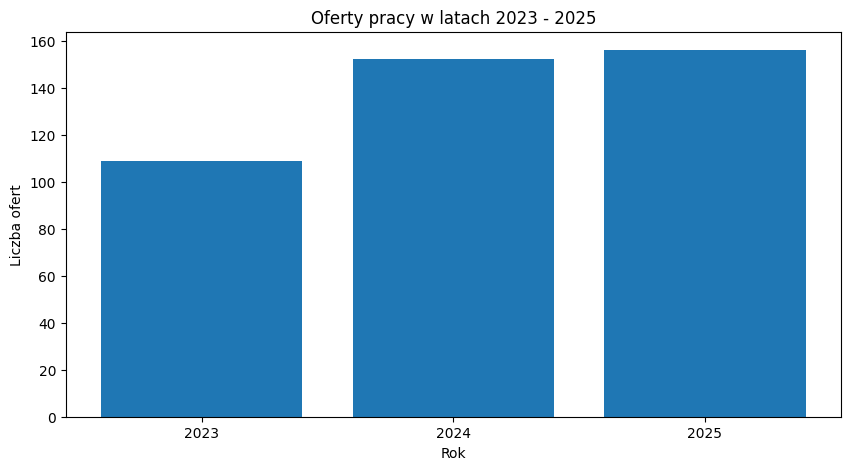

In [141]:
df['Data ogłoszenia'] = pd.to_datetime(df['Data ogłoszenia'], format='mixed')

df['Rok'] = df['Data ogłoszenia'].dt.year

counts = df[df['Rok'].isin([2025, 2024, 2023])]['Rok'].value_counts()
counts.index = counts.index.astype(int)

print(counts)

plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts)
plt.title('Oferty pracy w latach 2023 - 2025')
plt.xlabel('Rok')
plt.ylabel('Liczba ofert')
plt.xticks(counts.index)
plt.show()